<a href="https://colab.research.google.com/github/venkateshakula1729/BSE662-Course-Project-Foraging-Based/blob/master/MNE%20python%20group/Foraging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install MNE version 1.8
!pip install mne==1.8.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.8 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import mne
import matplotlib.pyplot as plt

Loading 31730.set ...
Loading 43000.set ...
Loading 47131.set ...
Loading 47204.set ...
Loading 47324.set ...
Loading 48238.set ...
Plotting PSD of the raw data...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


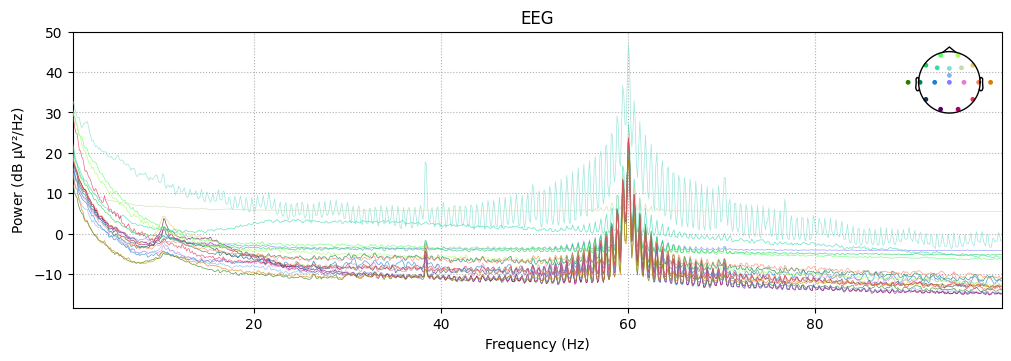

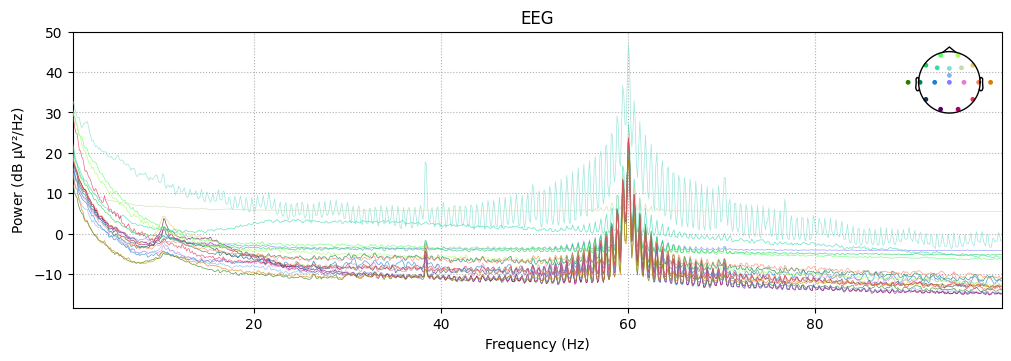

In [ ]:

# Define the list of set files
set_files = ['31730.set', '43000.set', '47131.set', '47204.set', '47324.set', '48238.set']

# Load each .set file into an MNE Raw object
raw_list = []
for fname in set_files:
    print(f"Loading {fname} ...")
    raw = mne.io.read_raw_eeglab(fname, preload=True)
    raw_list.append(raw)

# For demonstration, we will process the first file in the list
raw = raw_list[0]

# -------------------------------
# STEP 1: Plot PSD of the raw data
# -------------------------------
print("Plotting PSD of the raw data...")
raw.plot_psd(fmin=0.5, fmax=100, show=True)




In [ ]:

# -------------------------------
# STEP 2: Clean the data
#   2.1. Since line noise is known to be 60 Hz in America, we directly apply a notch filter.
# -------------------------------
print("Applying notch filter at 60 Hz to remove line noise...")
raw_clean = raw.copy().notch_filter(freqs=[60], verbose=False)


# -------------------------------
#   2.2. We apply a bandpass filter between 0.5 and 90 Hz.
# -------------------------------
print("Applying bandpass filter (0.5 - 90 Hz) on the cleaned data...")
raw_clean.filter(l_freq=0.5, h_freq=90, verbose=False)



Applying notch filter at 60 Hz to remove line noise...
Applying bandpass filter (0.5 - 90 Hz) on the cleaned data...


<RawEEGLAB | 31730.set, 19 x 1322500 (5290.0 s), ~191.7 MB, data loaded>

Plotting PSD of the cleaned data...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


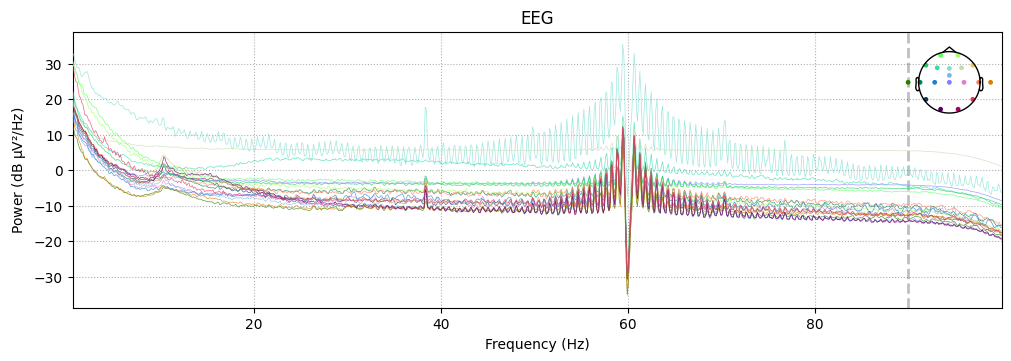

In [ ]:

# -------------------------------
# STEP 3: Plot the PSD of the cleaned data
# -------------------------------
print("Plotting PSD of the cleaned data...")
raw_clean.plot_psd(fmin=0.5, fmax=100, show=True)

plt.show()

In [ ]:

# -------------------------------
# STEP 3: Marker Extraction
# -------------------------------

print("Extracting event markers from annotations...")

# We try to retrieve annotations from the cleaned raw data
annotations = raw_clean.annotations
print("Annotations:")
print(annotations)

# We assume that each annotation's description has a format like "TRIGGER EVENT X".
unique_markers = set(desc.split()[-1].strip() for desc in annotations.description)
print("Unique marker letters extracted:", unique_markers)

# We initialize a dictionary to count trials for each condition:
# - 'pre_short' and 'pre_long' for prestress conditions;
# - 'post_short' and 'post_long' for poststress conditions.
trial_counts = {"pre_short": 0, "pre_long": 0, "post_short": 0, "post_long": 0}

# We use a variable to keep track of the current stress condition based on block markers.
current_block = None

# We Loop over all annotations in time order.
# Marker codes (as expected) are:
#   B: Start of prestress block
#   I: Start of poststress block
#   T: Travel time ~5s   -> short environment trial
#   U: Travel time ~20s  -> long environment trial

for onset, desc in zip(annotations.onset, annotations.description):
    # We will extract the marker letter from the annotation by taking the last token.
    marker = desc.split()[-1].strip()

    if marker == 'B':
        current_block = 'pre'
    elif marker == 'I':
        current_block = 'post'
    # Only count travel time markers if we have a valid current block
    elif marker in ['T', 'U'] and current_block is not None:
        if marker == 'T':
            trial_counts[f"{current_block}_short"] += 1
        elif marker == 'U':
            trial_counts[f"{current_block}_long"] += 1

print("Trial counts per environment:")
print(trial_counts)

Extracting event markers from annotations...
Annotations:
<Annotations | 896 segments: TRIGGER EVENT A (1), TRIGGER EVENT B (1), ...>
Unique marker letters extracted: {'P', 'O', 'H', 'S', 'N', 'M', 'R', '22', 'F', 'C', 'B', 'U', 'I', 'E', 'J', 'D', 'T', 'X', 'G', 'Z', 'A', 'Q'}
Trial counts per environment:
{'pre_short': 41, 'pre_long': 32, 'post_short': 41, 'post_long': 34}



Processing file: 31730.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


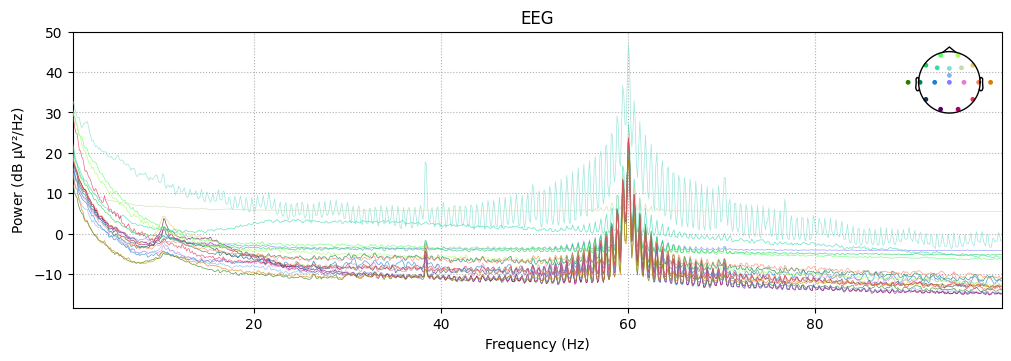

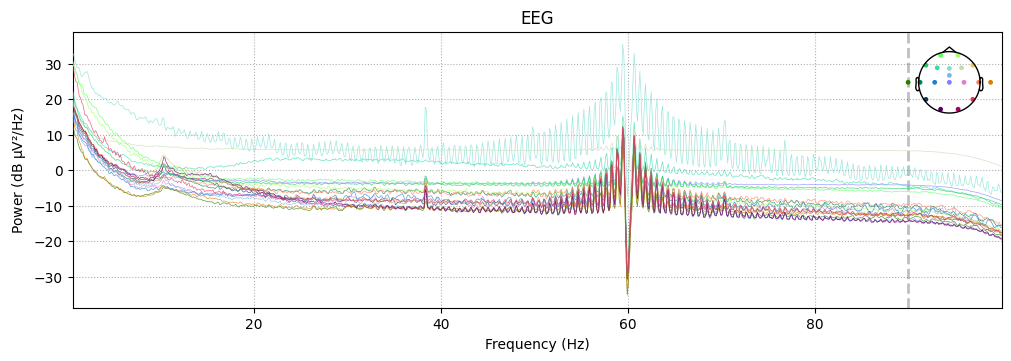

Unique marker letters found: {'H', 'R', 'P', 'Z', 'S', 'N', 'E', 'D', 'I', 'C', 'A', 'B', 'X', 'O', 'F', 'M', '22', 'T', 'U', 'Q', 'J', 'G'}
Trial counts for this file:
{'pre_short': 41, 'pre_long': 32, 'post_short': 41, 'post_long': 34}

Processing file: 43000.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


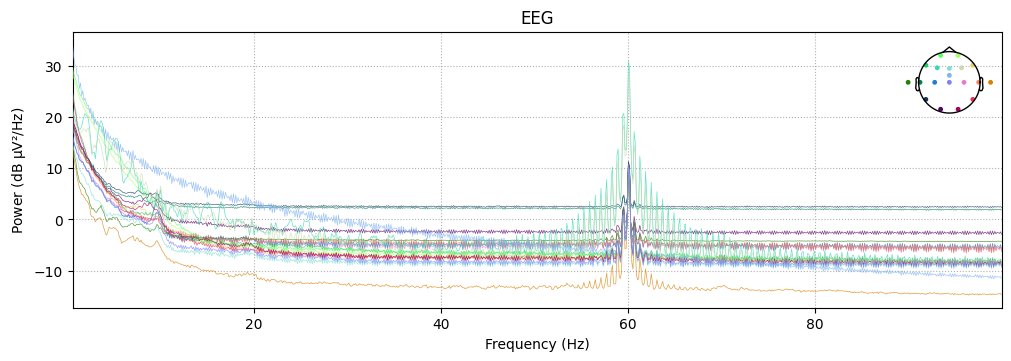

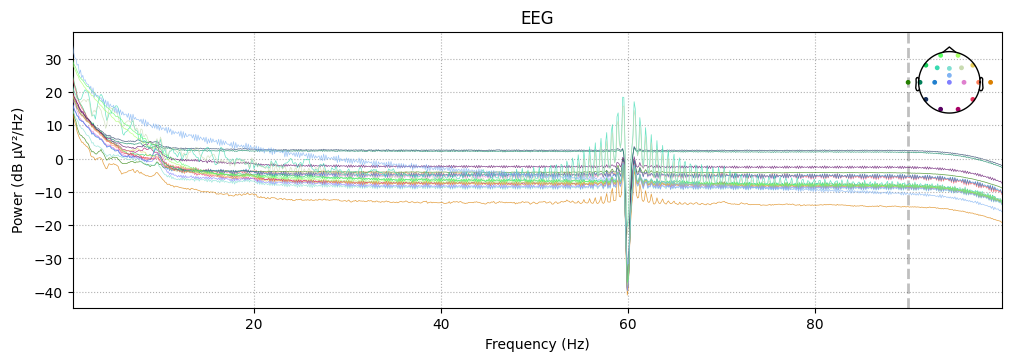

Unique marker letters found: {'H', 'R', 'P', 'Z', 'S', 'N', 'E', 'D', 'I', 'C', 'A', 'B', 'O', 'F', 'M', 'T', 'U', 'Q', 'J', 'G'}
Trial counts for this file:
{'pre_short': 42, 'pre_long': 39, 'post_short': 44, 'post_long': 39}

Processing file: 47131.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


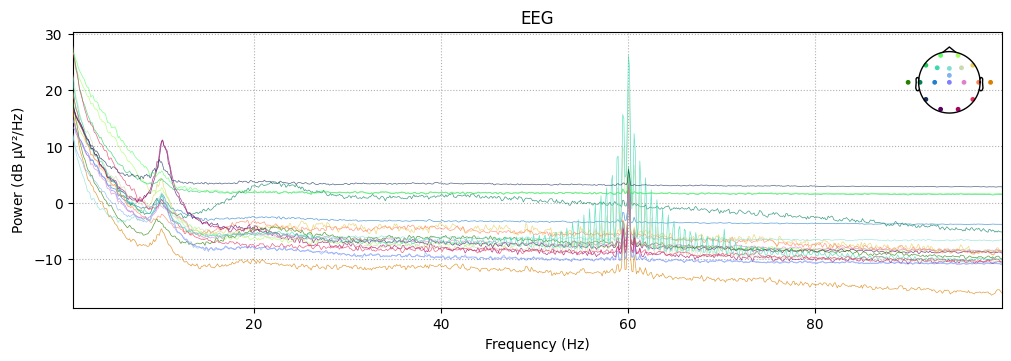

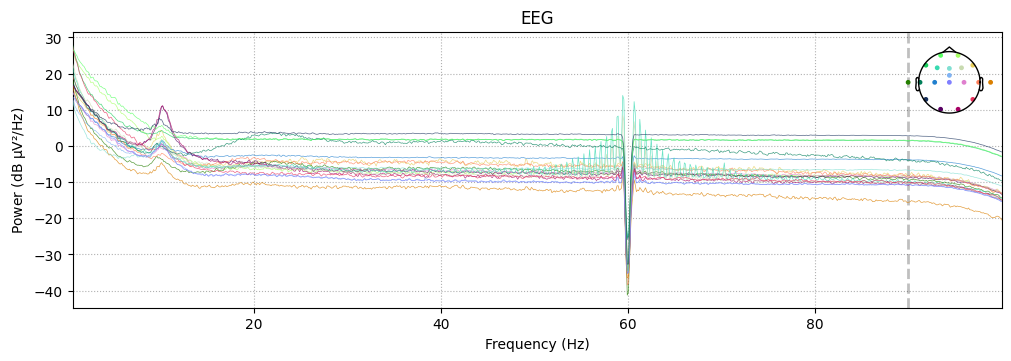

Unique marker letters found: {'H', 'R', 'P', 'Z', 'S', 'N', 'E', 'D', 'I', 'C', 'A', 'K', 'B', 'X', '24', 'O', 'F', 'M', 'T', 'U', 'Q', 'Event', 'J', 'G'}
Trial counts for this file:
{'pre_short': 44, 'pre_long': 39, 'post_short': 44, 'post_long': 40}

Processing file: 47204.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


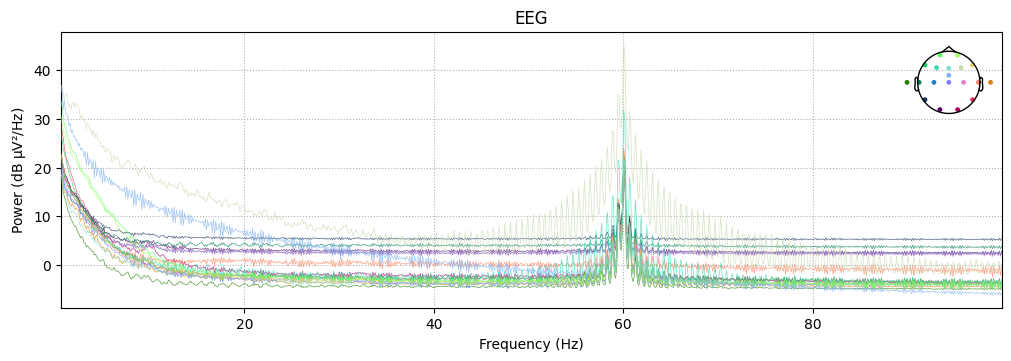

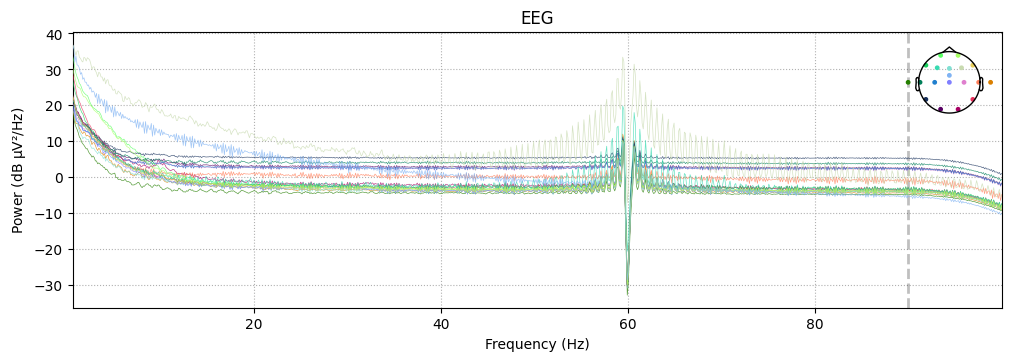

Unique marker letters found: {'H', 'R', 'P', 'Z', 'S', 'N', 'E', 'D', 'I', 'C', 'A', 'B', 'O', 'F', 'M', '22', 'T', 'U', 'Q', 'Event', 'J', 'G'}
Trial counts for this file:
{'pre_short': 32, 'pre_long': 37, 'post_short': 43, 'post_long': 38}

Processing file: 47324.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


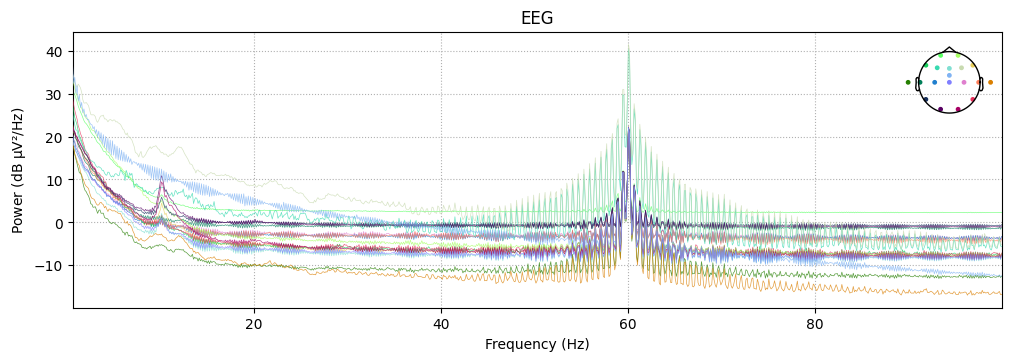

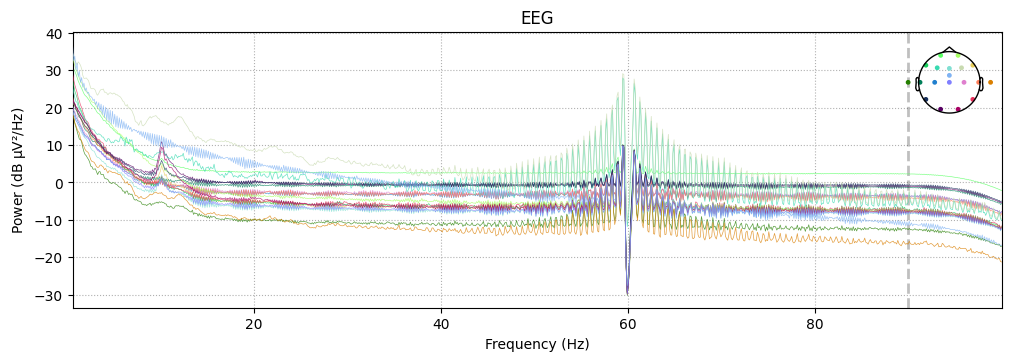

Unique marker letters found: {'H', 'R', 'P', 'Z', 'S', 'N', 'E', 'D', 'I', 'C', 'A', 'B', 'O', 'F', 'M', 'T', 'U', 'Q', '21', 'J', 'G'}
Trial counts for this file:
{'pre_short': 40, 'pre_long': 28, 'post_short': 40, 'post_long': 23}

Processing file: 48238.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


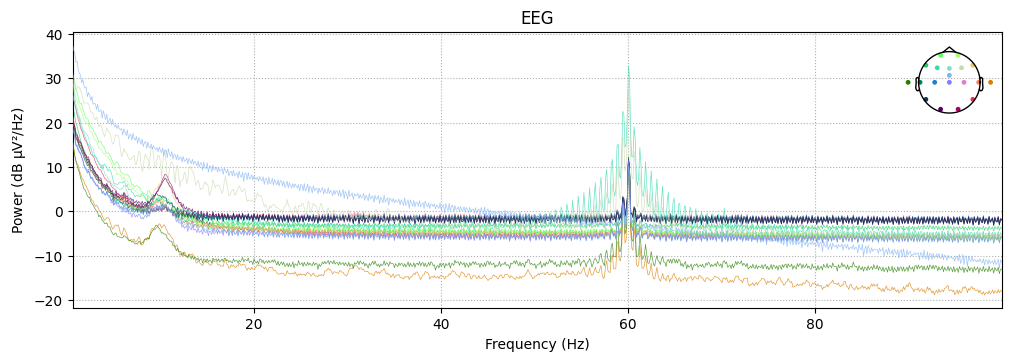

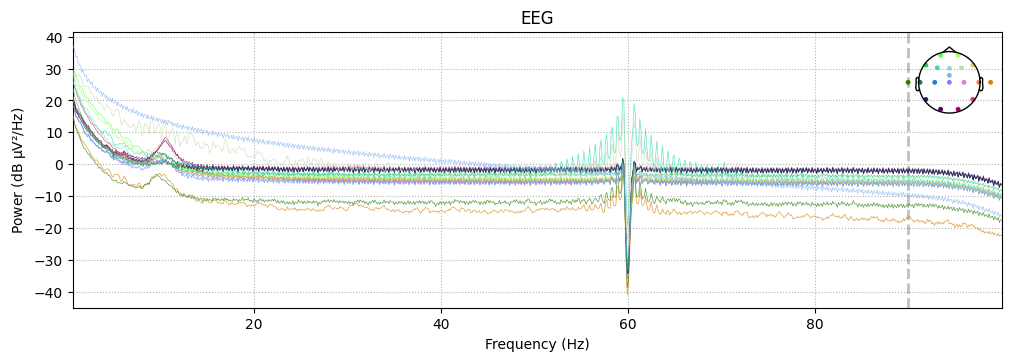

Unique marker letters found: {'H', 'R', 'P', 'Z', 'S', 'N', 'E', 'D', 'I', 'C', 'A', 'B', 'O', 'F', 'M', 'T', 'U', 'Q', '21', 'J', 'G'}
Trial counts for this file:
{'pre_short': 41, 'pre_long': 37, 'post_short': 45, 'post_long': 39}


========== FINAL SUMMARY ==========

File: 31730.set
  pre_short: 41
  pre_long: 32
  post_short: 41
  post_long: 34

File: 43000.set
  pre_short: 42
  pre_long: 39
  post_short: 44
  post_long: 39

File: 47131.set
  pre_short: 44
  pre_long: 39
  post_short: 44
  post_long: 40

File: 47204.set
  pre_short: 32
  pre_long: 37
  post_short: 43
  post_long: 38

File: 47324.set
  pre_short: 40
  pre_long: 28
  post_short: 40
  post_long: 23

File: 48238.set
  pre_short: 41
  pre_long: 37
  post_short: 45
  post_long: 39


In [ ]:
# Replicating the analysis for all the files

# List of .set files
set_files = ['31730.set', '43000.set', '47131.set', '47204.set', '47324.set', '48238.set']

# Store all results
all_trial_counts = {}

# Loop through each file
for fname in set_files:
    print(f"\n{'='*50}")
    print(f"Processing file: {fname}")
    print(f"{'='*50}")

    # Load data
    raw = mne.io.read_raw_eeglab(fname, preload=True)

    # Plot raw PSD
    print("Plotting raw PSD...")
    raw.plot_psd(fmin=0.5, fmax=100, show=True)

    # Clean data
    raw_clean = raw.copy().notch_filter(freqs=[60], verbose=False)
    raw_clean.filter(l_freq=0.5, h_freq=90, verbose=False)

    # Plot cleaned PSD
    print("Plotting cleaned PSD...")
    raw_clean.plot_psd(fmin=0.5, fmax=100, show=True)
    plt.show()

    # Extract Annotations
    annotations = raw_clean.annotations
    descriptions = annotations.description

    # Extract unique marker letters
    marker_letters = [desc.split()[-1].strip() for desc in descriptions]
    unique_markers = set(marker_letters)
    print("Unique marker letters found:", unique_markers)

    # Trial counting
    trial_counts = {"pre_short": 0, "pre_long": 0, "post_short": 0, "post_long": 0}
    current_block = None

    for desc in descriptions:
        marker = desc.split()[-1].strip()

        if marker == 'B':
            current_block = 'pre'
        elif marker == 'I':
            current_block = 'post'
        elif marker in ['T', 'U'] and current_block is not None:
            if marker == 'T':
                trial_counts[f"{current_block}_short"] += 1
            elif marker == 'U':
                trial_counts[f"{current_block}_long"] += 1

    # Store results
    all_trial_counts[fname] = trial_counts

    print("Trial counts for this file:")
    print(trial_counts)


print("\n\n========== FINAL SUMMARY ==========")
for fname, counts in all_trial_counts.items():
    print(f"\nFile: {fname}")
    for cond, count in counts.items():
        print(f"  {cond}: {count}")
